# DL MIDTERM QUESTION NOTEBOOK
### Read the relevant intructions carefully while filling this notebook.
### Marks on the top of the cells indicate maximum marks alloted to the cell.
### Using internet or other resources is not allowed.
### Use help() fuction for syntax related doubts.

## 1) These are the necessary library imports 

In [148]:
import numpy as np
import pandas as pd
import sklearn.datasets as skd
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt


## 2) Initial import and data segregation (5 MARKS)
### Load the breast cancer dataset from sklearn
### Split independent and dependent variables 
### Normalize independent variables for l2 norm 
### Print dimension information about the dataset. Print names of the independent features and the target variables

In [241]:
breast_cancer = skd.load_breast_cancer()
# X = torch.tensor( breast_cancer.data , dtype=torch.float32)
# y = torch.tensor( breast_cancer.target, dtype=torch.float32)

X = breast_cancer.data  # Independent variables
y = breast_cancer.target 

X_normalized = normalize(X, norm='l2')


print("Independent variables have dimensions:",X.shape)
print("Dependent variables have dimensions:", y.shape)

# Print names of the independent features and the target variables
print("Names of the independent features:")
print(breast_cancer.feature_names)
print("\nName of the target variable:")
print(breast_cancer.target_names)

Independent variables have dimensions: (569, 30)
Dependent variables have dimensions: (569,)
Names of the independent features:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Name of the target variable:
['malignant' 'benign']


## 3) Creating a test train split tensors and preparing dataloader (5 MARKS)
### Create a train-test split using the imported data (70% for training and 30% for testing)
### Convert these data arrays into tensors
### Create a tensor dataset using above tensors
### Create Pytorch dataLoader instances for training and testing

In [231]:
# Create train-test split using the imported data (70% for training and 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

# Convert data arrays into tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create a tensor dataset using above tensors
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)

test_dataset = TensorDataset(X_test_tensor,y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [232]:
train_dataset

In [233]:
n_samples, n_features = X_train.shape
print(n_samples, n_features)

398 30


## 4) Create a Neural Network model and initiate it. Also define the loss criterion and optimizer (5 MARKS)
### Create a neural network with 3 hidden layers use adequate activation functions
### (Class is already created you have to fill the layers part and other incomplete information)
### Define the model, define loss function (preferably binary cross entropy loss), and optimizer (preferably ADAM optimizer)

In [234]:
class Net_diabetes(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size):
        super(Net_diabetes, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_size, hidden_size1),
            nn.ReLU(),
            nn.Linear(hidden_size1, hidden_size2),
            nn.ReLU(),
            nn.Linear(hidden_size2, hidden_size3),
            nn.ReLU(),
            nn.Linear(hidden_size3, output_size),
            nn.Sigmoid()  # Sigmoid activation for binary classification
        )
    def forward(self, x):
        return self.layers(x) 


In [238]:
# input_size = X_train.shape[1]
# hidden_size1 = 300
# hidden_size2 = 150
# hidden_size3 = 10
# output_size = 1


input_size = X_train.shape[1] 
hidden_size1 = 64
hidden_size2 = 32
hidden_size3 = 16
output_size = 1 


model = Net_diabetes(input_size, hidden_size1, hidden_size2, hidden_size3, output_size)
criterion = nn.BCELoss()
#criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## 5) Set a training loop, train the model and evaluate it using test set (5 MARKS)
### Create training loops by setting epochs (50 epochs)
### Finish the loop (set the gradients, get initial output, calculate the loss, backward propogation...etc...)
### Plot the training loss 
### Evaluate the model on the test set

Epoch [1/50], Loss: 0.6748
Epoch [2/50], Loss: 0.6612
Epoch [3/50], Loss: 0.6628
Epoch [4/50], Loss: 0.6556
Epoch [5/50], Loss: 0.6534
Epoch [6/50], Loss: 0.6503
Epoch [7/50], Loss: 0.6421
Epoch [8/50], Loss: 0.6293
Epoch [9/50], Loss: 0.6078
Epoch [10/50], Loss: 0.5727
Epoch [11/50], Loss: 0.5209
Epoch [12/50], Loss: 0.4623
Epoch [13/50], Loss: 0.4224
Epoch [14/50], Loss: 0.3984
Epoch [15/50], Loss: 0.3895
Epoch [16/50], Loss: 0.3518
Epoch [17/50], Loss: 0.3155
Epoch [18/50], Loss: 0.2952
Epoch [19/50], Loss: 0.2866
Epoch [20/50], Loss: 0.2705
Epoch [21/50], Loss: 0.2575
Epoch [22/50], Loss: 0.2491
Epoch [23/50], Loss: 0.2691
Epoch [24/50], Loss: 0.2925
Epoch [25/50], Loss: 0.2533
Epoch [26/50], Loss: 0.2462
Epoch [27/50], Loss: 0.2661
Epoch [28/50], Loss: 0.2517
Epoch [29/50], Loss: 0.2475
Epoch [30/50], Loss: 0.2444
Epoch [31/50], Loss: 0.2276
Epoch [32/50], Loss: 0.2449
Epoch [33/50], Loss: 0.2364
Epoch [34/50], Loss: 0.2445
Epoch [35/50], Loss: 0.2528
Epoch [36/50], Loss: 0.2468
E

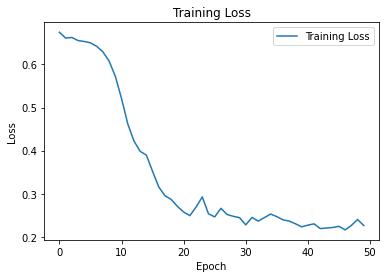

In [239]:

num_epochs = 50
train_losses = []

for epoch in range(num_epochs):
    epoch_losses = []
    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Set gradients to zero
        
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(), labels.float())  # Calculate loss
        
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        
        epoch_losses.append(loss.item())  # Store loss for this batch
    
    # Calculate average loss for this epoch
    epoch_loss_avg = sum(epoch_losses) / len(epoch_losses)
    train_losses.append(epoch_loss_avg)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss_avg:.4f}")

# Plot training loss
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()


In [240]:
# Evaluate the model on the test set
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = torch.round(outputs)  # Convert probabilities to binary predictions
        total += labels.size(0)
        correct += (predicted.squeeze() == labels.float()).sum().item()

    accuracy = correct / total
    print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.9415
